In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt

from nilearn import plotting
from os.path import join
from glob import glob
from matplotlib.colors import LinearSegmentedColormap

#sns.set_context('poster')


In [2]:
def grab_corr(subjects, nodes, task, condition, session, atlas):
    errors = pd.Series(index=subjects)
    edges = pd.Series(index=subjects, name='edge')
    node1 = nodes[0]
    node2 = nodes[1]
    for subject in subjects:
        try:
            if condition != None:
                corrmat = np.genfromtxt(join(data_dir, '{0}-session-{1}_{2}-{3}_{4}-corrmat.csv'.format(subject, 
                                                                                                        session, 
                                                                                                        task, 
                                                                                                        condition, 
                                                                                                        atlas)),
                                        delimiter=' ')
            else:
                corrmat = np.genfromtxt(join(data_dir, '{0}-session-{1}-{2}_network_corrmat_{3}.csv'.format(subject, 
                                                                                                        session, 
                                                                                                        task, 
                                                                                                        atlas)),
                                        delimiter=',')
            edges[subject] = corrmat[node1][node2]
            #post_retr_conn.at[subject] = np.ravel(corrmat, order='F')
        except Exception as e:
            errors[subject] = e
    return edges


In [3]:
fig_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/figures'
data_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data/output/'
roi_dir = '/Users/katherine/Dropbox/Data/templates/shen2015/'


In [4]:
shen_nii = '/Users/katherine/Dropbox/Projects/physics-retrieval/shen2015_2mm_268_parcellation.nii.gz'
coordinates = plotting.find_parcellation_cut_coords(labels_img=shen_nii)


In [5]:
subgraphs = glob(join(data_dir, '*sig-edges.csv'))

In [6]:
bx_dir = '/Users/katherine/Dropbox/Projects/physics-retrieval/data/rescored'
b_df = pd.read_csv(join(bx_dir, 'non-brain-data.csv'), index_col=0, header=0)


In [7]:
b_df.drop(['GPA', 'Age', 'Handedness', 'Strt.Level', 'RetrPhyAcc1',
       'Mean Correct RT Pre', 'RetrPhyAcc2', 'Mean Correct RT Post',
       'FCIPhyAcc1', 'FCIPhyAcc2', 'GID Pre', 'GID Post',
       'deltaRetrPhyAcc', 'deltaFCIPhyAcc', 'Phy48Grade', 'Sex', 'Ethnic.Grp',
       'Class.Type', 'Subject', 'Lec', 'SexXClass', 'VCI1XClass',
       'VCI2XClass', 'deltaVCIXClass', 'PRI1XClass', 'PRI2XClass',
       'deltaPRIXClass', 'WMI1XClass', 'WMI2XClass', 'deltaWMIXClass',
       'PSI1XClass', 'PSI2XClass', 'deltaPSIXClass', 'FSIQ1XClass',
       'FSIQ2XClass', 'deltaFSIQXClass', 'VCI1XClassXSex', 'VCI1XSex',
       'VCI2XClassXSex', 'VCI2XSex', 'deltaVCIXClassXSex', 'deltaVCIXSex',
       'PRI1XClassXSex', 'PRI1XSex', 'PRI2XClassXSex', 'PRI2XSex',
       'deltaPRIXClassXSex', 'deltaPRIXSex', 'WMI1XClassXSex', 'WMI1XSex',
       'WMI2XClassXSex', 'WMI2XSex', 'deltaWMIXClassXSex', 'deltaWMIXSex',
       'PSI1XClassXSex', 'PSI1XSex', 'PSI2XClassXSex', 'PSI2XSex',
       'deltaPSIXClassXSex', 'deltaPSIXSex', 'FSIQ1XClassXSex', 'FSIQ1XSex',
       'FSIQ2XClassXSex', 'FSIQ2XSex', 'deltaFSIQXClassXSex', 'deltaFSIQXSex'], axis=1, inplace=True)


In [8]:
husl_pal = sns.husl_palette(h=0, n_colors=268)
crayons_l = sns.crayon_palette(['Vivid Tangerine', 'Cornflower'])
crayons_d = sns.crayon_palette(['Brick Red', 'Midnight Blue'])
grays = sns.light_palette('#999999', n_colors=3, reverse=True)

f_2 = sns.crayon_palette(['Red Orange', 'Vivid Tangerine'])
m_2 = sns.crayon_palette(['Cornflower', 'Cerulean'])


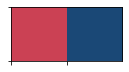

In [9]:
sns.palplot(crayons_d)

(15, 125)
(46, 250)
(125, 15)
(137, 262)
(137, 253)
(219, 231)
(231, 219)
(250, 46)
(253, 137)
(262, 137)
(73, 104)
(73, 231)
(102, 164)
(104, 73)
(104, 254)
(111, 164)
(164, 102)
(164, 111)
(188, 200)
(192, 214)
(200, 188)
(214, 192)
(231, 73)
(241, 243)
(243, 241)
(254, 104)
(6, 125)
(15, 125)
(31, 187)
(88, 163)
(94, 125)
(125, 94)
(125, 6)
(125, 15)
(163, 88)
(187, 31)
(187, 199)
(199, 187)
(219, 231)
(231, 219)
(102, 164)
(164, 102)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

(15, 125)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(20, 135)
(31, 187)
(46, 243)
(46, 250)
(62, 250)
(89, 250)
(91, 243)
(94, 125)
(119, 262)
(125, 94)
(125, 15)
(132, 243)
(135, 20)
(137, 262)
(187, 31)
(187, 199)
(199, 187)
(219, 231)
(226, 243)
(231, 219)
(243, 46)
(243, 91)
(243, 132)
(243, 226)
(250, 46)
(250, 62)
(250, 89)
(262, 119)
(262, 137)
(1, 141)
(102, 164)
(104, 254)
(111, 164)
(141, 1)
(164, 102)
(164, 111)
(188, 200)
(200, 188)
(254, 104)
(181, 198)
(198, 181)


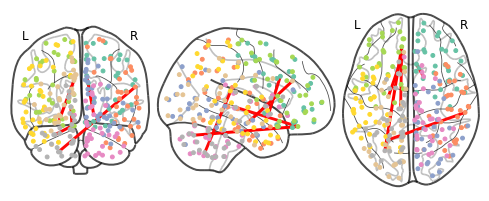

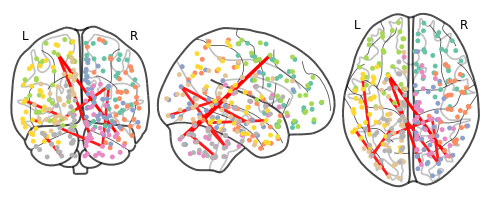

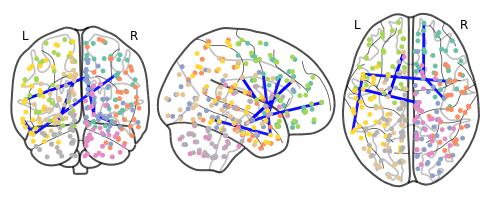

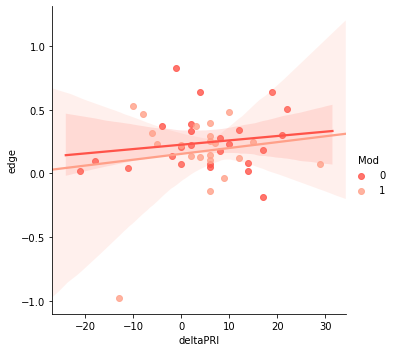

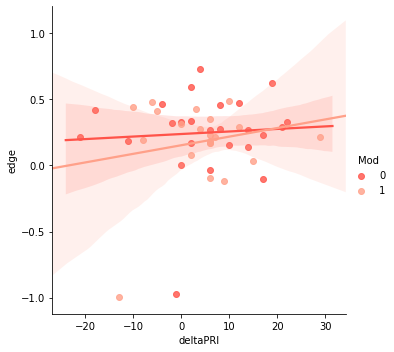

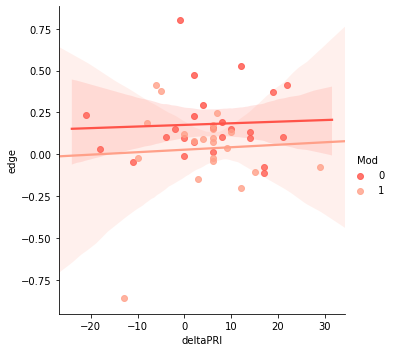

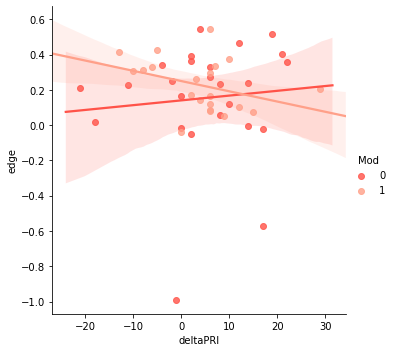

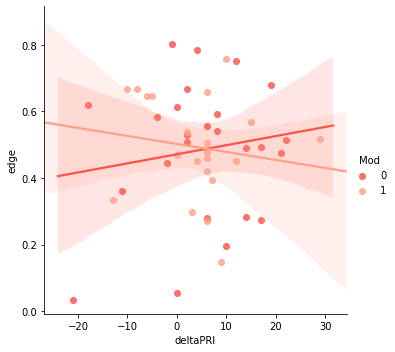

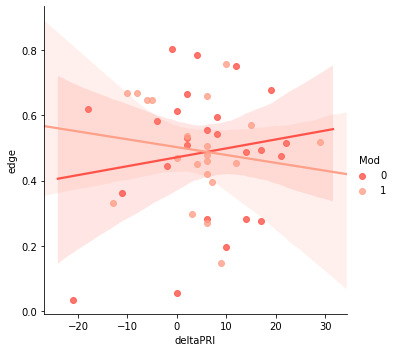

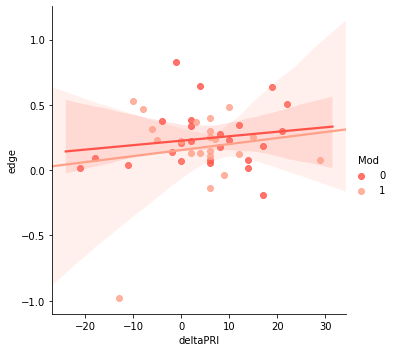

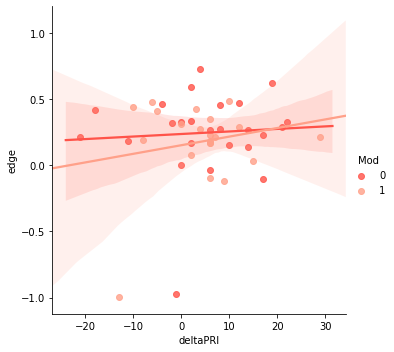

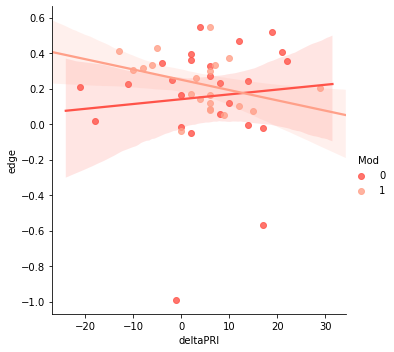

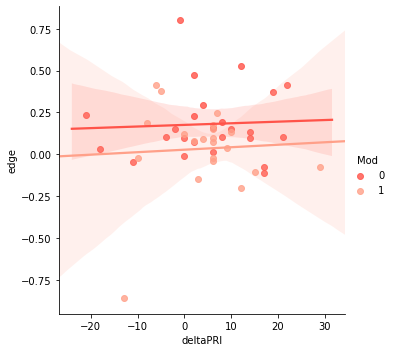

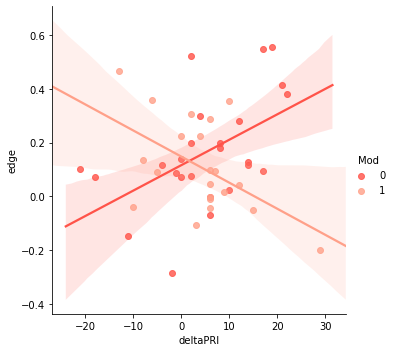

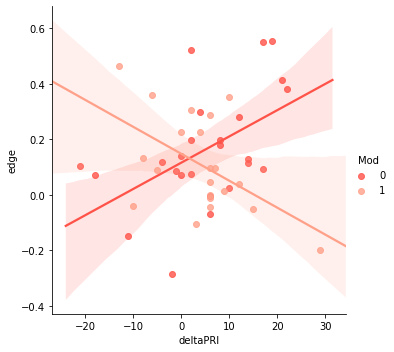

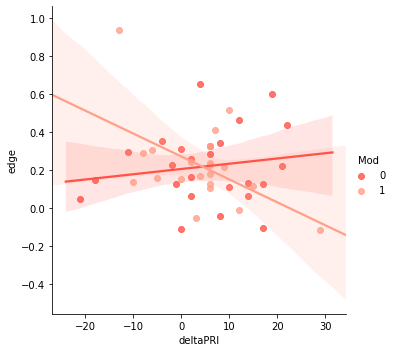

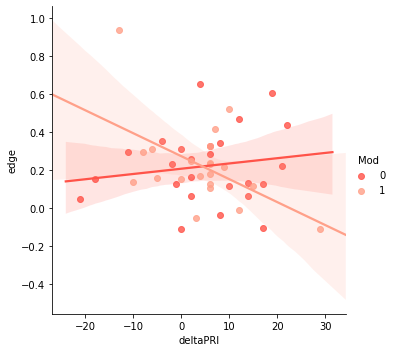

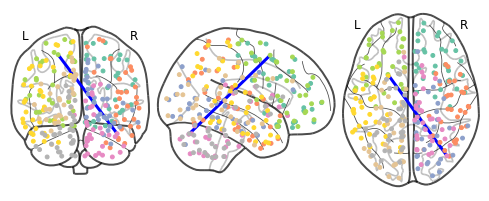

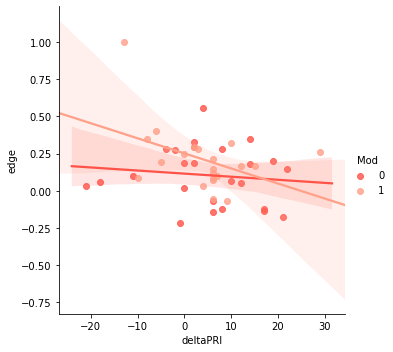

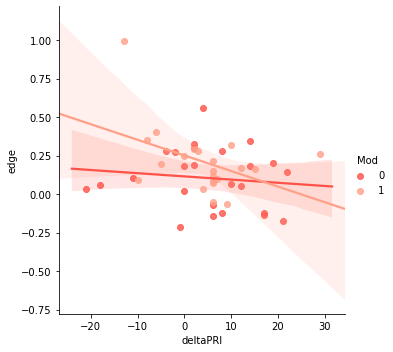

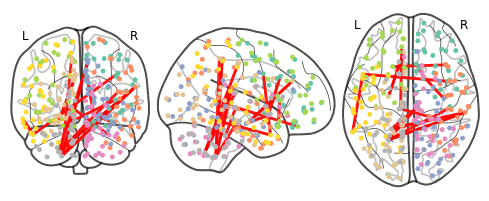

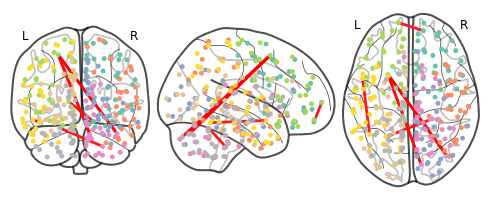

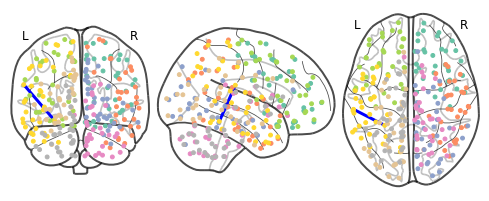

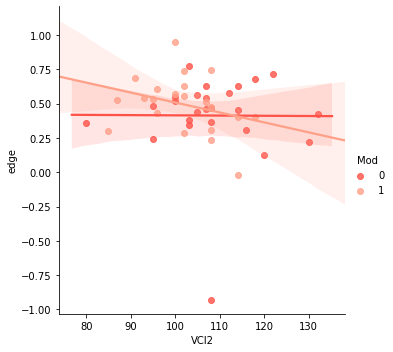

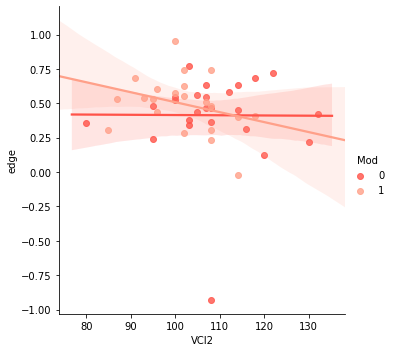

In [30]:
node_size = 15

for subgraph in subgraphs[2:]:
    regression = subgraph[64:-4]
    iq = regression.split('_')[0]
    if regression.split('_')[1][:3] == 'fci':
        task = 'fci'
        condition = 'Physics'
    if regression.split('_')[1][:4] == 'retr':
        task = 'retr'
        condition = 'Physics'
    else:
        task = 'rest'
        condition = None
    conns = pd.read_csv(subgraph, index_col=0, header=0)
    for i in conns.index:
        conns.at[i, 'x'] = coordinates[i-1][0]
        conns.at[i, 'y'] = coordinates[i-1][1]
        conns.at[i, 'z'] = coordinates[i-1][2]
    conns.set_index([conns.index, 'x', 'y', 'z'], inplace=True)
    q = plotting.plot_connectome(conns, coordinates, node_size=node_size)
    q.savefig(
        join(fig_dir, '{0}.png'.format(regression)), dpi=300)
    conns.dropna(how='all', axis=0, inplace=True)
    conns.dropna(how='all', axis=1, inplace=True)
    conns.fillna(0, inplace=True)
    conns.sort_index(level='x', ascending=False, inplace=True)
    conns.index.rename(['idx', 'x', 'y', 'z'], inplace=True)
    nodes = list(conns.index.get_level_values('idx').astype(str))
    mask = np.triu(np.ones_like(conns.values, dtype=np.bool))
    
    if conns.max().max() > 0:
        cmap = 'Oranges'
        one = conns.idxmax(axis=0)
        two = conns.idxmax(axis=1)
    else:
        cmap = 'Purples_r'
        one = conns.idxmin(axis=0)
        two = conns.idxmin(axis=1)
    edges = []
    for column in conns.columns:
        ind = conns[conns[column] != 0].index
        for i in ind:
            #print(column, i[0])
            edges.append((int(column), i[0]))

    for edge in edges:
        print(edge)
        e = grab_corr(b_df.index, edge, 'retr', 'Physics', '1', 'shen2015')
        iq = iq.split('X')[0]
        scatter_df = pd.concat([e, b_df[[iq, 'F', 'Mod']]], axis=1)

        if 'Sex' in regression:
            if not 'Class' in regression:
                h = sns.lmplot(iq, 'edge', data=scatter_df, hue='F', palette=crayons_d)
                h.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(regression, edge)), dpi=300)
                plt.close()
        if 'Class' in regression:
            if not 'Sex' in regression:
                h = sns.lmplot(iq, 'edge', data=scatter_df, hue='Mod', palette=grays)
                h.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(regression, edge)), dpi=300)
                plt.close()
            else:
                h = sns.lmplot(iq, 'edge', data=scatter_df[scatter_df['F'] == 1], hue='Mod', palette=f_2)
                h.savefig(join(fig_dir, '{0}-{1}-scatter-f.png'.format(regression, edge)), dpi=300)
                h = sns.lmplot(iq, 'edge', data=scatter_df[scatter_df['F'] == 0], hue='Mod', palette=m_2)
                h.savefig(join(fig_dir, '{0}-{1}-scatter-m.png'.format(regression, edge)), dpi=300)
                plt.close()
        else:
            fig1,ax1 = plt.subplots(figsize=(7,7))
            sns.regplot(scatter_df[iq], scatter_df['edge'], color='0.5')
            sns.despine()
            plt.tight_layout()
            fig1.savefig(join(fig_dir, '{0}-{1}-scatter.png'.format(regression, edge)), dpi=300)
            plt.close()

    fig, ax = plt.subplots(figsize=(11, 10))
    g = sns.heatmap(conns[nodes], mask=mask, square=True,
                    cmap=cmap, linecolor='0.9', linewidths=1)
    g.set_yticklabels(labels=nodes, rotation=0)
    g.set_title(regression)
    fig.savefig(join(fig_dir, '{0}-heatmap.png'.format(regression)), dpi=300)
    plt.close()
    rois = None
    roi_nifti = nib.load(join(roi_dir, 'roi{0}.nii.gz'.format(int(nodes[0]))))
    roi = roi_nifti.get_fdata()
    rois = (roi * float(nodes[0]))
    if len(nodes) > 1:
        for node in nodes[1:]:
            roi_nifti = nib.load(
                join(roi_dir, 'roi{0}.nii.gz'.format(int(node))))
            roi = roi_nifti.get_fdata()
            rois += (roi * int(node))
    else:
        pass
    rois_nifti = nib.Nifti1Image(rois, roi_nifti.affine)
    rois_nifti.to_filename(join(data_dir, '{0}_nodes.nii.gz'.format(regression)))
    h = plotting.plot_glass_brain(rois_nifti, cmap=LinearSegmentedColormap.from_list(
        husl_pal, husl_pal, N=268), vmin=0, vmax=268)
    h.savefig(join(fig_dir, '{0}_ROIs.png'.format(regression)), dpi=300)
    plt.close()